# **EXPLORATORY DATA ANALYSIS**

### **Loading the Data**
* We will load the dataset.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/industry.xlsx'
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **General Information**
* Basic information is printed about the dataset, including data types, missing values, and basic statistics for each column.

In [2]:
print("General Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5000 non-null   datetime64[ns]
 1   machines   5000 non-null   int64         
 2   pressure   5000 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 117.3 KB
None

Missing Values:
timestamp    0
machines     0
pressure     0
dtype: int64

Basic Statistics:
                 timestamp      machines      pressure
count                 5000   5000.000000  5.000000e+03
mean   2023-06-01 16:30:00    802.933200  7.748895e+05
min    2023-06-01 15:00:00      1.000000  0.000000e+00
25%    2023-06-01 15:45:00      4.000000  4.147500e+02
50%    2023-06-01 16:30:00      8.000000  8.315000e+02
75%    2023-06-01 17:15:00     12.000000  1.248000e+03
max    2023-06-01 18:00:00  16135.000000  1.477435e+07
std                    NaN   2789.412281

**Output Explanation**
* The dataset consists of 5000 entries and 3 columns timestamp, machines, and pressure.
* timestamp is a datetime.
* machines and pressure are integers.
* The dataset uses approximately 117.3 KB of memory.
* There are no missing values in any column.
* Count: All columns have 5000 entries.
* Average machines: ~803
* Average pressure: ~774,889.5 PSI
* Minimum machines: 1
* Minimum pressure: 0 PSI
* 25% of machines values are ≤ 4
* 25% of pressure values are ≤ 414.75 PSI
* Median machines: 8
* Median pressure: 831.5 PSI
* 75% of machines values are ≤ 12
* 75% of pressure values are ≤ 1248 PSI
* Maximum machines: 16,135
* Maximum pressure: 14,774,350 PSI
* machines: 2789.41
* pressure: 2,688,270.0 PSI

### **Time Series Plot of Machine and Pressure**
* The timestamp column is converted to a datetime format and it is set as the index.
* The time series of the number of machines and the pressure are plotted to visualize trends over time.

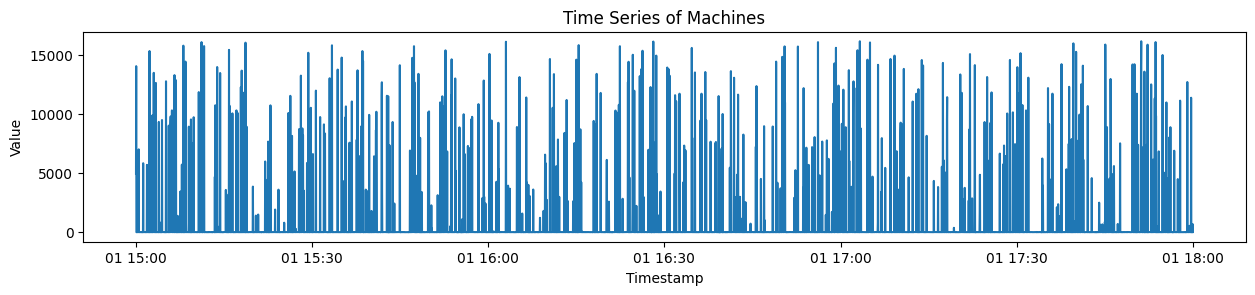

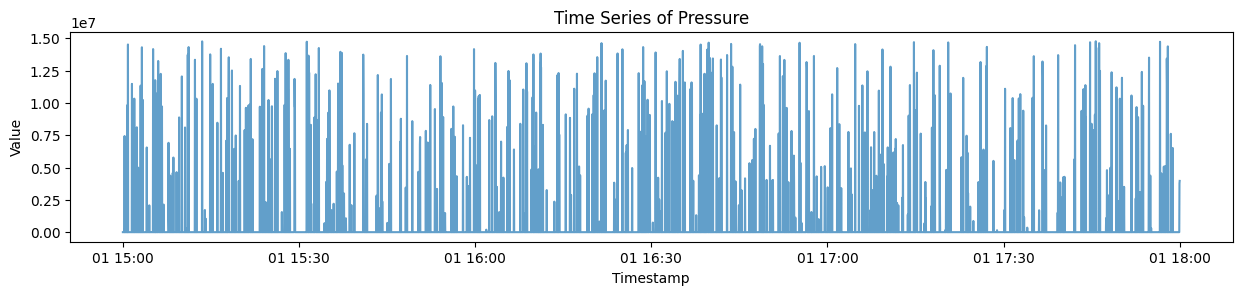

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

plt.figure(figsize=(15, 6))
plt.subplot(2,1,1)
plt.plot(df.index, df['machines'])
plt.title('Time Series of Machines')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(2,1,2)
plt.plot(df.index, df['pressure'], alpha=0.7)
plt.title('Time Series of Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

**Output Explanation**
* The number of machines in operation varies significantly over time, fluctuating between 0 and approximately 16,000.
* The plot shows frequent spikes and drops, indicating high variability in machine usage.
* The pressure applied also shows considerable fluctuations, ranging from 0 to about 14,000,000 PSI.
* Similar to the machines, there are many spikes and drops, suggesting periods of both low and high-pressure application.

### **Box Plot**
* Box plots for the 'machines' and 'pressure' columns of the dataset are generated to provide a visual summary of their distribution and identify potential outliers

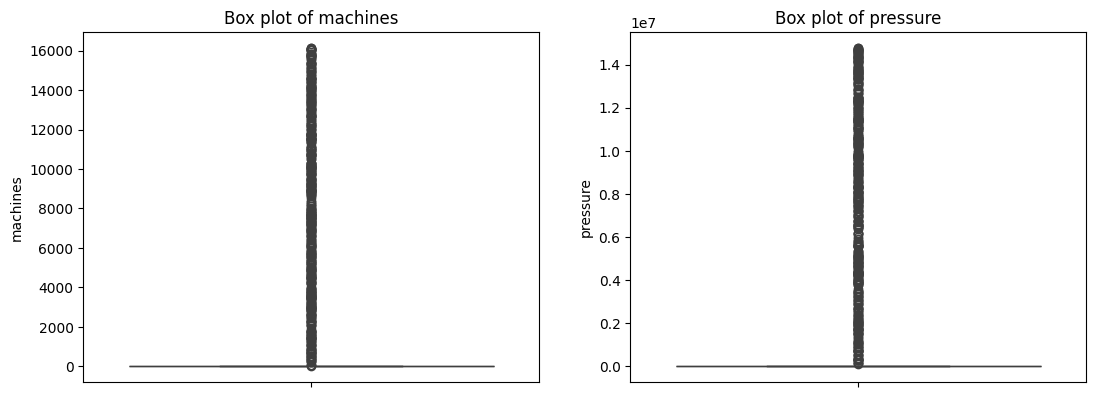

In [4]:
columns = ['machines', 'pressure']
plt.figure(figsize=(20, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.show()

**Output Explanation**
* The box plot indicates a significant number of outliers, with values extending up to approximately 16,000.
* The main body of the data is compressed near the lower end, suggesting a highly skewed distribution.
* Similar to the 'machines' column, the 'pressure' column also displays a large number of outliers, with values reaching up to about 14 million.
* The core data is also concentrated at the lower end, indicating skewness.

### **Distribution of Machines and Pressure**
* Histograms are created for the machines and pressure columns to understand their distributions.

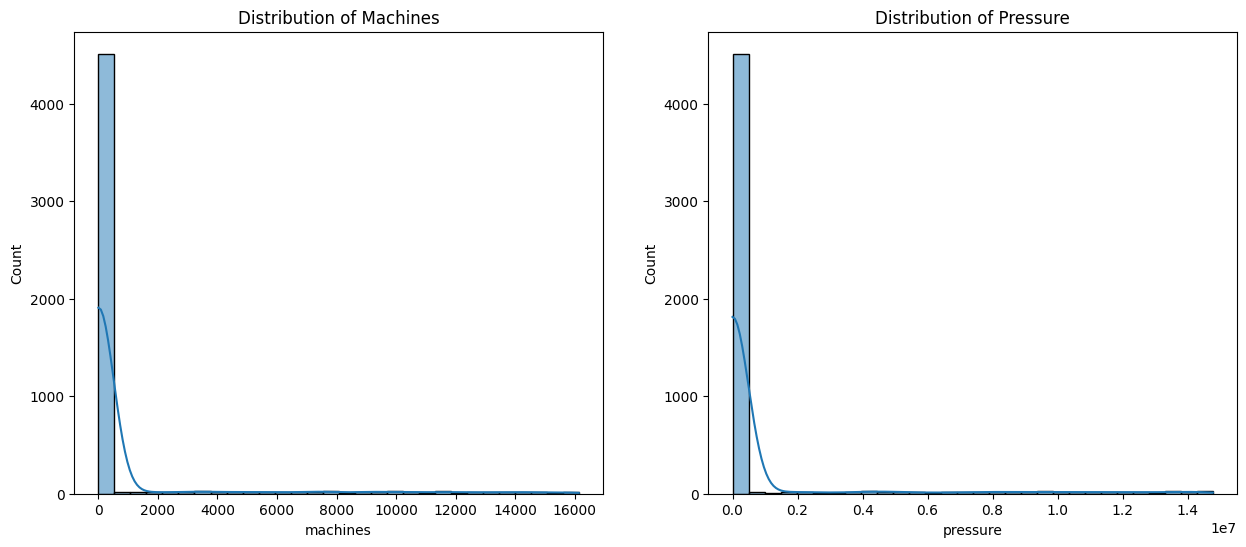

In [5]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['machines'], bins=30, kde=True)
plt.title('Distribution of Machines')

plt.subplot(1, 2, 2)
sns.histplot(df['pressure'], bins=30, kde=True)
plt.title('Distribution of Pressure')
plt.show()

**Output Explanation**
* The distribution of the number of machines is highly skewed to the right.
Most values are clustered at the lower end, with a steep drop-off as the number increases.
* A large majority of the observations have fewer than 2,000 machines.
* The distribution of pressure values is also highly skewed to the right.
Most pressure values are close to zero, with a rapid decline as the values increase.
* A significant number of observations have pressure values below 200,000 PSI, with very few reaching higher levels.

### **Scatter Plot**
* A scatter plot is generated to examine the relationship between the number of machines and the pressure applied.

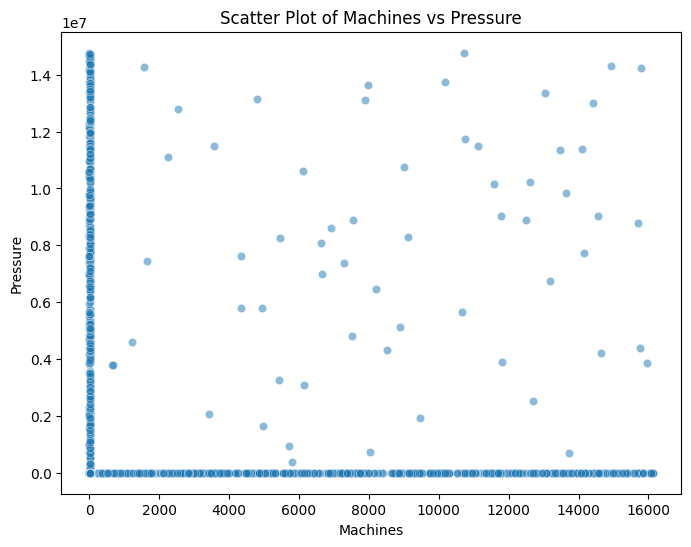

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='machines', y='pressure', data=df, alpha=0.5)
plt.title('Scatter Plot of Machines vs Pressure')
plt.xlabel('Machines')
plt.ylabel('Pressure')
plt.show()

**Output Explanation**
* The scatter plot shows the relationship between the number of machines and pressure.
* The x-axis represents the number of machines, and the y-axis represents the pressure values.
* Most of the data points are clustered at the lower end of the pressure scale, with many points showing zero pressure.
* There is no clear pattern or trend observable in the data, indicating no obvious correlation between the number of machines and pressure.

### **Handling Duplicates**
* Check for and removing any duplicate rows if they exist.

In [7]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()

Number of duplicate rows: 366


**Output Explanation**
* The dataset contains 366 duplicate rows.
* These duplicates are removed to ensure data quality and avoid misleading analysis.

# **IQR method**

### **Identify Outliers**
* Outliers are detected in the specified columns using the Interquartile Range (IQR) method.
* The IQR is calculated, the lower and upper bounds are determined, and rows are with values outside these bounds are identified as outliers.

In [8]:
def identify_outliers(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = pd.concat([outliers, df[(df[column] < lower_bound) | (df[column] > upper_bound)]])
    outliers = outliers.drop_duplicates()
    return outliers

### **Outlier Removal Function**
* Outliers are removed from the specified columns based on the IQR method.
* The DataFrame is filtered to retain only rows within the defined bounds.

In [9]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

### **Identify and Print Outliers**
* The outliers in the specified columns are identified and printed.

In [10]:
columns_to_check = ['machines', 'pressure']

outliers = identify_outliers(df, columns_to_check)

print(outliers)

                         machines  pressure
timestamp                                  
2023-06-01 15:00:00.000      4948      1426
2023-06-01 15:00:02.160     14031         9
2023-06-01 15:00:28.086      7001      1093
2023-06-01 15:01:13.455      5828       880
2023-06-01 15:01:52.342      5689       254
...                           ...       ...
2023-06-01 17:57:54.695         4   9972185
2023-06-01 17:57:59.016         7  14379324
2023-06-01 17:58:29.262         2   7612001
2023-06-01 17:58:48.706        13   6517057
2023-06-01 18:00:00.000        10   3967339

[939 rows x 2 columns]


**Output Explanation**
* The output displays a DataFrame with 939 rows, highlighting the identified outliers in the 'machines' and 'pressure' columns.

### **Original Time Series are Plotted with Outliers Highlighted**
* The original time series data is visualized and the identified outliers are highlighted in red.

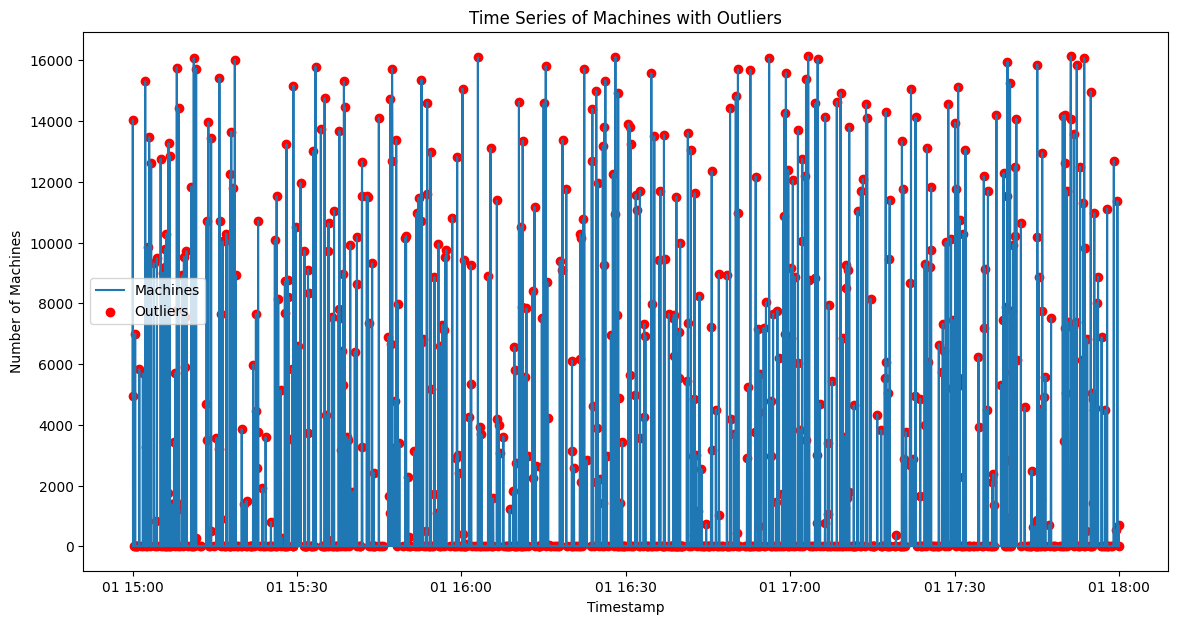

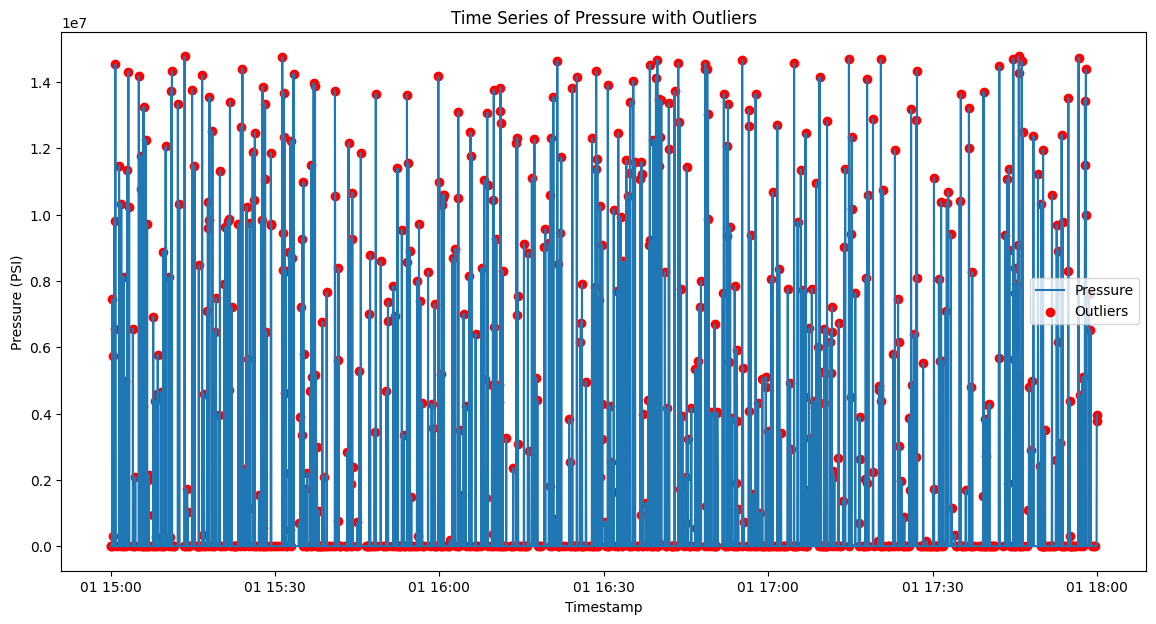

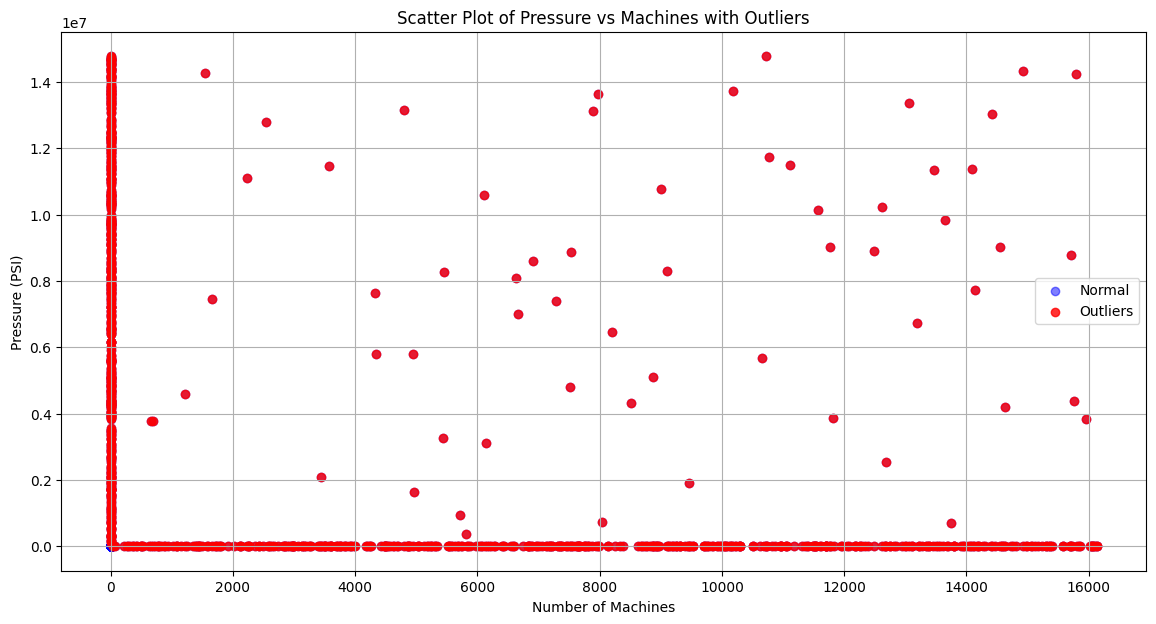

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['machines'], label='Machines')
plt.scatter(outliers.index, outliers['machines'], color='red', label='Outliers')
plt.title('Time Series of Machines with Outliers')
plt.xlabel('Timestamp')
plt.ylabel('Number of Machines')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['pressure'], label='Pressure')
plt.scatter(outliers.index, outliers['pressure'], color='red', label='Outliers')
plt.title('Time Series of Pressure with Outliers')
plt.xlabel('Timestamp')
plt.ylabel('Pressure (PSI)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))

plt.scatter(df['machines'], df['pressure'], color='blue', label='Normal', alpha=0.5)

plt.scatter(outliers['machines'], outliers['pressure'], color='red', label='Outliers', alpha=0.8)

plt.title('Scatter Plot of Pressure vs Machines with Outliers')
plt.xlabel('Number of Machines')
plt.ylabel('Pressure (PSI)')
plt.legend()
plt.grid(True)

plt.show()

**Output Explanation**
* The two time series plots show the original data with outliers highlighted in red.

### **Outliers are removed**
* The outliers are removed from the specified columns.

In [12]:
df_correct_cleaned = remove_outliers(df, columns_to_check)

### **Cleaned General Information**
* Basic information is printed about the dataset, including data types, missing values, and basic statistics for each column.

In [13]:
print("General Information:")
print(df_correct_cleaned.info())

print("\nMissing Values:")
print(df_correct_cleaned.isnull().sum())

print("\nBasic Statistics:")
print(df_correct_cleaned.describe())

General Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3695 entries, 2023-06-01 15:00:04.321000 to 2023-06-01 17:59:55.679000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   machines  3695 non-null   int64
 1   pressure  3695 non-null   int64
dtypes: int64(2)
memory usage: 86.6 KB
None

Missing Values:
machines    0
pressure    0
dtype: int64

Basic Statistics:
          machines     pressure
count  3695.000000  3695.000000
mean      7.502571   754.512314
std       4.034291   432.287960
min       1.000000     0.000000
25%       4.000000   376.000000
50%       8.000000   756.000000
75%      11.000000  1123.000000
max      14.000000  1500.000000


**Output Explanation**
* Data type: DataFrame with a DatetimeIndex.
* Entries: 3695 from 2023-06-01 15:00:04.321 to 2023-06-01 17:59:55.679.
* Columns: 2 (machines and pressure), both of type int64.
* Memory usage: 86.6 KB.
* No missing values in either column (machines or pressure).

### **Cleaned Box Plot**
* Box plots for the 'machines' and 'pressure' columns of the cleaned dataset are generated to provide a visual summary of their distribution

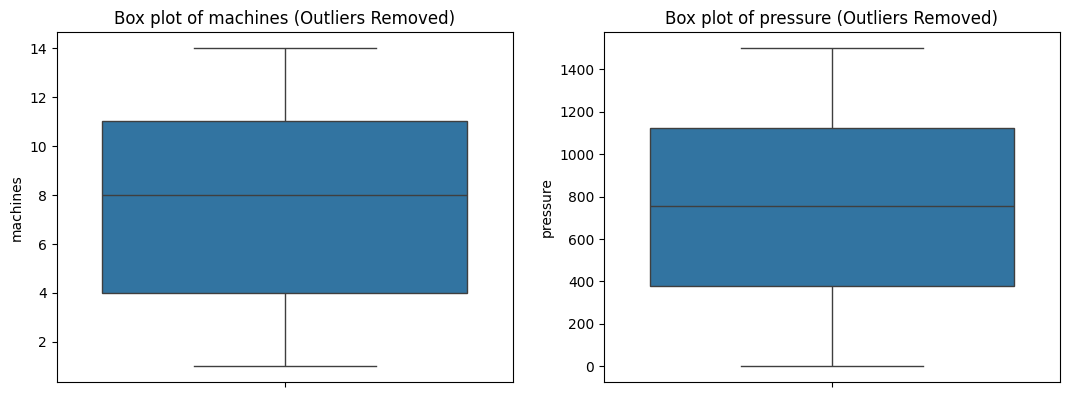

In [14]:
columns = ['machines', 'pressure']
plt.figure(figsize=(20, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_correct_cleaned[col])
    plt.title(f'Box plot of {col} (Outliers Removed)')
plt.show()

**Code Explanation**
* Both plots show a central tendency and spread of the data after removing any outliers.

### **Distribution of Cleaned Machines and Cleaned Pressure**
* Histograms are created for the cleaned machines and cleaned pressure columns to understand their distributions.

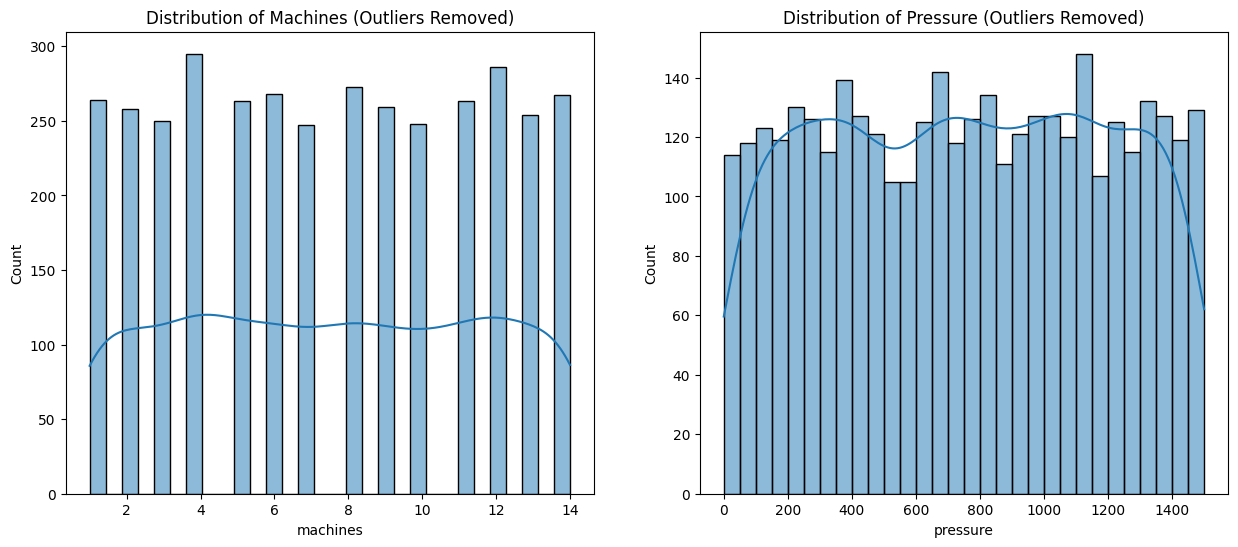

In [15]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_correct_cleaned['machines'], bins=30, kde=True)
plt.title('Distribution of Machines (Outliers Removed)')

plt.subplot(1, 2, 2)
sns.histplot(df_correct_cleaned['pressure'], bins=30, kde=True)
plt.title('Distribution of Pressure (Outliers Removed)')
plt.show()

**Output Explanation**
* The count of machines is relatively uniform across different values, with slight variations.
* The density line shows a mostly flat distribution, indicating no significant peaks or valleys.
* The count of pressure values is more evenly spread, with minor fluctuations.
* The density line indicates a fairly stable distribution with no pronounced peaks.

### **Cleaned Scatter Plot**
* A scatter plot is generated to examine the relationship between the number of cleaned machines and the cleaned pressure applied.

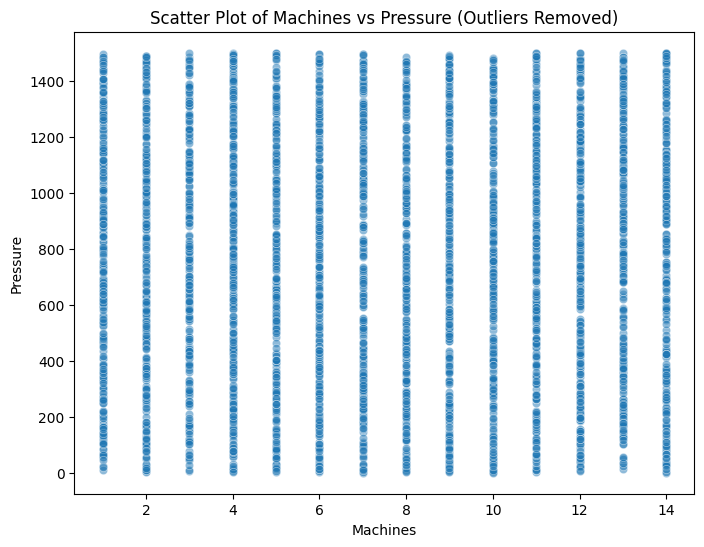

                         machines  pressure
timestamp                                  
2023-06-01 15:00:04.321         1      1389
2023-06-01 15:00:06.481        13      1004
2023-06-01 15:00:08.642         8       779
2023-06-01 15:00:10.802        12       787
2023-06-01 15:00:12.963         5      1119
...                           ...       ...
2023-06-01 17:59:47.037         4       994
2023-06-01 17:59:49.198        14      1320
2023-06-01 17:59:51.358         2       722
2023-06-01 17:59:53.519         3      1322
2023-06-01 17:59:55.679         8       696

[3695 rows x 2 columns]


In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='machines', y='pressure', data=df_correct_cleaned, alpha=0.5)
plt.title('Scatter Plot of Machines vs Pressure (Outliers Removed)')
plt.xlabel('Machines')
plt.ylabel('Pressure')
plt.show()

print(df_correct_cleaned)

**Output Explanation**
* The plot shows a uniform distribution of data points for each machine count.
* There is no clear pattern or trend between the number of machines and pressure, indicating a lack of correlation.

# **Anomaly Detection**

## **Isolation Forest**

### **Importing Libraries and Defining Parameter Grid**
* Importing necessary libraries for data manipulation, machine learning, and plotting.
* Defining a grid of contamination values for the Isolation Forest model to iterate over.

In [17]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

param_grid = {
    'contamination': [i/100 for i in range(10, 51, 10)]
}

### **Extracting Features and Initializing Variables**
* Extracting the relevant features (machines and pressure) from the dataset for the Isolation Forest model.
* Initializing variables to keep track of the best parameters and highest F1 score.
* Preparing feature arrays from df_cleaned and outliers datasets for evaluation.
* Initializing a list to store F1 scores for different contamination values.

In [18]:
features = df[['machines', 'pressure']]

best_params = None
best_score = -np.inf

features_cleaned = df_correct_cleaned[['machines', 'pressure']]
features_outliers = outliers[['machines', 'pressure']]

f1_scores_by_contamination = []

### **Iterating over Contamination Values and Evaluating Model**
* Iterating over each contamination value in the parameter grid.
* Initializing and fitting the Isolation Forest model with the current contamination value.
* Predicting anomalies for the main dataset, cleaned dataset, and outliers dataset.
* Converting the predictions to binary format (1 for anomaly, 0 for normal).
* Calculating performance metrics (true positives, true negatives, false positives, false negatives) and computing the F1 score.
* Storing the F1 score and updating the best parameters if the current model achieves a better score.

In [19]:
for contamination in param_grid['contamination']:
    isolation_forest = IsolationForest(
        n_estimators=100,
        contamination=contamination,
        random_state=42
    )

    isolation_forest.fit(features)

    y_pred = isolation_forest.predict(features)
    y_pred_cleaned = isolation_forest.predict(features_cleaned)
    y_pred_outliers = isolation_forest.predict(features_outliers)

    y_pred_binary = np.where(y_pred == -1, 1, 0)
    y_pred_cleaned_binary = np.where(y_pred_cleaned == -1, 1, 0)
    y_pred_outliers_binary = np.where(y_pred_outliers == -1, 1, 0)

    true_positives = np.sum(y_pred_outliers_binary)
    true_negatives = np.sum(1 - y_pred_cleaned_binary)
    false_positives = np.sum(y_pred_binary[~features.index.isin(outliers.index)])
    false_negatives = np.sum(1 - y_pred_binary[features.index.isin(outliers.index)])

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    f1_scores_by_contamination.append(f1_score)

    if f1_score > best_score:
        best_score = f1_score
        best_params = {
            'contamination': contamination
        }

### **Plotting F1 Score and Identifying best parameters**
* Plotting the F1 scores for each contamination value to visualize the model performance.
* Printing the best parameters (contamination value) that resulted in the highest F1 score.

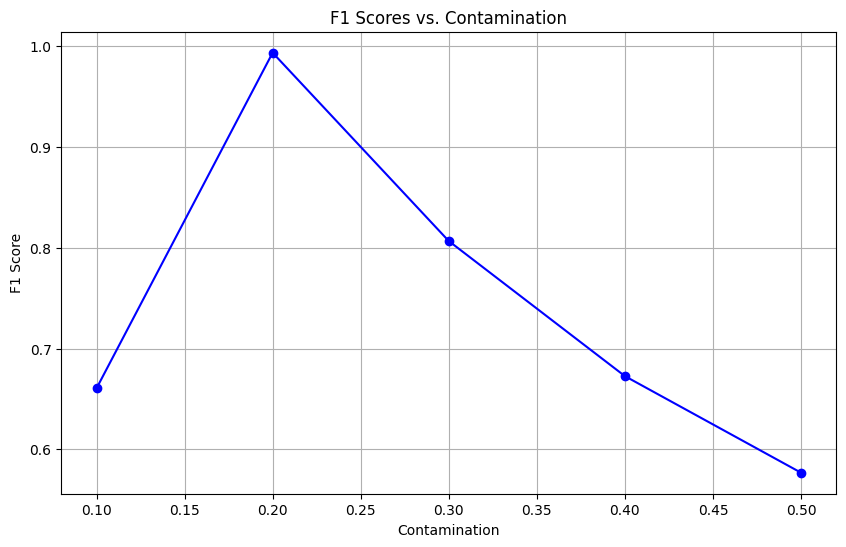


Best parameters found:
{'contamination': 0.2}


In [20]:
plt.figure(figsize=(10, 6))
plt.plot(param_grid['contamination'], f1_scores_by_contamination, marker='o', linestyle='-', color='b')
plt.title('F1 Scores vs. Contamination')
plt.xlabel('Contamination')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

print("\nBest parameters found:")
print(best_params)

**Code Explanation**
* The plot shows how the F1 score varies with different contamination values.
* The F1 score increases from a contamination of 0.1, peaks at 0.2, and then decreases as the contamination value continues to rise.
* The highest F1 score is achieved at a contamination level of 0.2, which is approximately 1.0.
* The best contamination parameter is found to be 0.2, as it corresponds to the highest F1 score in the plot.

### **Fitting Isolation Forest with Best Parameters and Predicting Anomalies**
* Fitting the Isolation Forest model using the best contamination value found.
* Predicting anomalies on the main dataset and mapping the predictions to a new column (anomaly) where 1 indicates an anomaly and 0 indicates normal.
* Printing the rows of the dataset that were detected as anomalies.

In [21]:
best_isolation_forest = IsolationForest(
    n_estimators=100,
    contamination=best_params['contamination'],
    random_state=42
)
best_isolation_forest.fit(features)

df['anomaly'] = best_isolation_forest.predict(features)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

print(df[df['anomaly'] == 1])

                         machines  pressure  anomaly
timestamp                                           
2023-06-01 15:00:00.000      4948      1426        1
2023-06-01 15:00:02.160     14031         9        1
2023-06-01 15:00:17.283         9   7440451        1
2023-06-01 15:00:21.604         5    303219        1
2023-06-01 15:00:25.925         9   5736410        1
...                           ...       ...      ...
2023-06-01 17:59:03.829     12691       699        1
2023-06-01 17:59:27.594       539       871        1
2023-06-01 17:59:42.717     11362       665        1
2023-06-01 17:59:57.840       688   3775428        1
2023-06-01 18:00:00.000        10   3967339        1

[927 rows x 3 columns]


**Output Explanation**
* The DataFrame snippet shows the rows that have been identified as anomalies (where anomaly is 1).
* Flag indicating if the row is an anomaly (1 for anomaly, 0 for normal).
* Each row represents a timestamp with its corresponding machine, pressure values, and anomaly flag.
* The DataFrame displays 927 rows that have been marked as anomalies.

### **Visualizing Anomalies**
* Creating visualizations to highlight the detected anomalies.
* Scatter plot showing the relationship between machines and pressure with anomalies marked.
* Time series plot showing machines and pressure over time with anomalies highlighted in red.

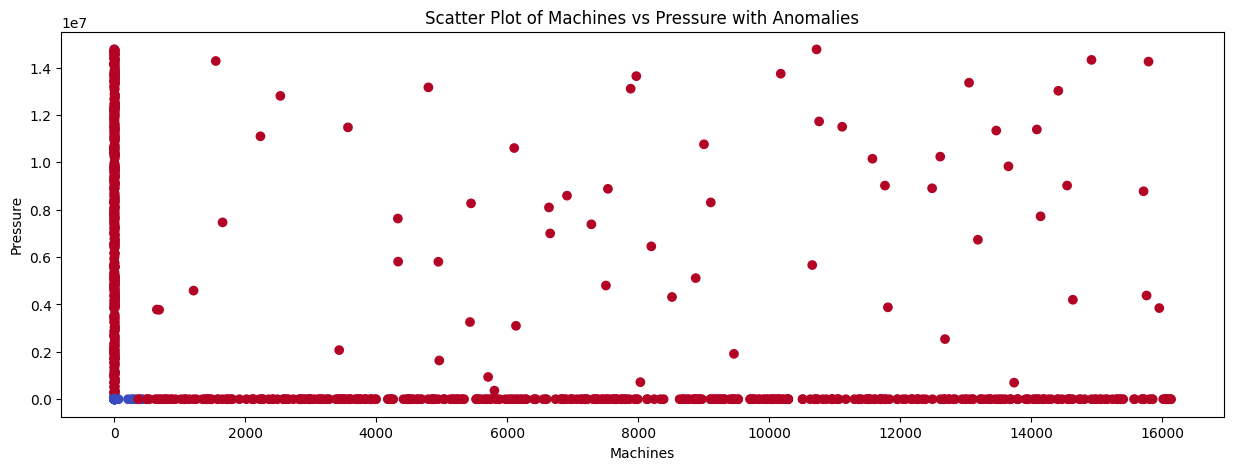

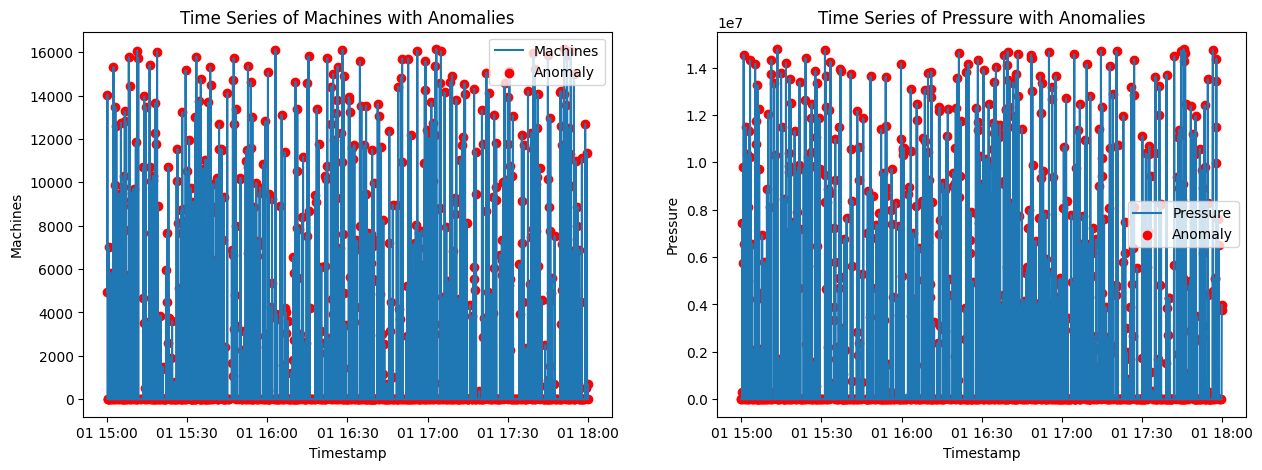

In [22]:
plt.figure(figsize=(15, 5))

plt.scatter(df['machines'], df['pressure'], c=df['anomaly'], cmap='coolwarm')
plt.title('Scatter Plot of Machines vs Pressure with Anomalies')
plt.xlabel('Machines')
plt.ylabel('Pressure')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df.index, df['machines'], label='Machines')
ax[0].scatter(df[df['anomaly'] == 1].index, df[df['anomaly'] == 1]['machines'], color='red', label='Anomaly')
ax[0].set_title('Time Series of Machines with Anomalies')
ax[0].set_xlabel('Timestamp')
ax[0].set_ylabel('Machines')
ax[0].legend()

ax[1].plot(df.index, df['pressure'], label='Pressure')
ax[1].scatter(df[df['anomaly'] == 1].index, df[df['anomaly'] == 1]['pressure'], color='red', label='Anomaly')
ax[1].set_title('Time Series of Pressure with Anomalies')
ax[1].set_xlabel('Timestamp')
ax[1].set_ylabel('Pressure')
ax[1].legend()

plt.show()

**Output Explanation**
* Most anomalies have higher pressure values, with a few scattered across lower pressure values.
* Anomalies are distributed throughout the time series for both machines and pressure, with a higher concentration at certain timestamps.

### **Removing Anomalies and Creating a Cleaned DataFrame**
* Creating a new DataFrame df_cleaned by removing the rows identified as anomalies.
* Droping the anomaly column from the cleaned DataFrame.
* Printing the cleaned DataFrame to verify the results.

In [23]:
df_cleaned = df[df['anomaly'] == 0].drop(columns=['anomaly'])

print(df_cleaned)

                         machines  pressure
timestamp                                  
2023-06-01 15:00:04.321         1      1389
2023-06-01 15:00:06.481        13      1004
2023-06-01 15:00:08.642         8       779
2023-06-01 15:00:10.802        12       787
2023-06-01 15:00:12.963         5      1119
...                           ...       ...
2023-06-01 17:59:47.037         4       994
2023-06-01 17:59:49.198        14      1320
2023-06-01 17:59:51.358         2       722
2023-06-01 17:59:53.519         3      1322
2023-06-01 17:59:55.679         8       696

[3707 rows x 2 columns]


**Output Explanation**
* Each row represents a timestamp with its corresponding machine and pressure values.
* The DataFrame now contains 3707 rows, which are the remaining data points after removing the identified anomalies.

### **Visualizing Box Plots of Features Without Anomaliese**
* Importing the seaborn library for creating box plots.
* Defining the columns to be visualized.
* Creating box plots for the machines and pressure columns in the cleaned DataFrame to visually confirm the removal of outliers.

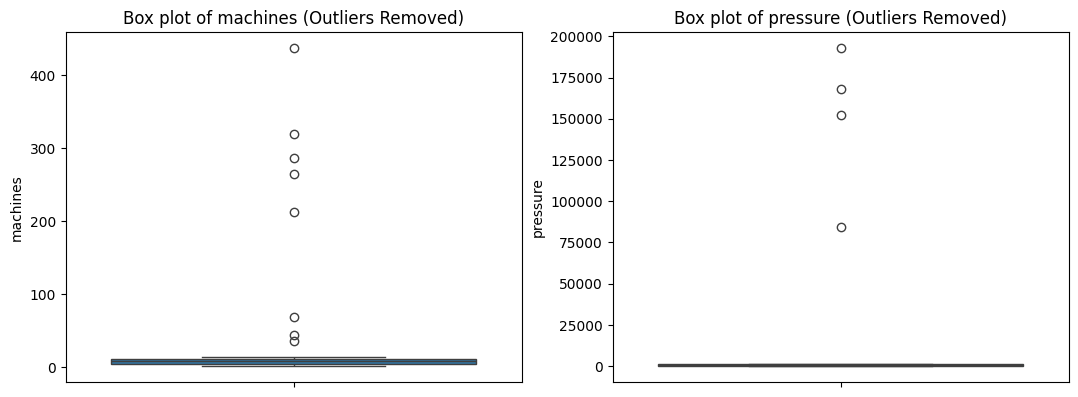

In [24]:
import seaborn as sns

columns = ['machines', 'pressure']
plt.figure(figsize=(20, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box plot of {col} (Outliers Removed)')
plt.show()

**Output Explanation**
* The distribution of the 'machines' feature reveals a large number of outliers, indicated by the circles above the box plot.
* The main data is concentrated near the bottom, showing a skewed distribution with many extreme values.
* Similarly, the 'pressure' feature also has a significant number of outliers.
* The majority of the data points are clustered near the bottom, with a few extreme values extending far above the main data cluster

## **Auto Encoders**

### **Importing Libraries and Defining Functions**
* numpy and pandas for data manipulation.
* tensorflow for building and training the autoencoder model.
* StandardScaler from sklearn.preprocessing for feature scaling.
* mean_squared_error and f1_score from sklearn.metrics for evaluation.
* matplotlib and seaborn for data visualization.

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Normalization**
* Normalizing the features (machines and pressure) using StandardScaler.
* Normalization ensures that the data is scaled to have a mean of 0 and a standard deviation of 1, which helps in training the neural network effectively.

In [26]:
scaler = StandardScaler()
features = scaler.fit_transform(df[['machines', 'pressure']])

### **Defining the Auto Encoder Model**
* Input_layer takes inputs with the same shape as the normalized features.
* encoded is the hidden layer with a reduced dimensionality of 2.
* decoded reconstructs the input from the encoded representation.
* The model is compiled with the Adam optimizer and mean squared error loss function.

In [27]:
input_dim = features.shape[1]
encoding_dim = 2

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

### **Training the Auto Encoder**
* The autoencoder is trained using the normalized features.
* The model is trained for 100 epochs with a batch size of 32, using 20% of the data for validation.
* The training process is verbose, providing updates on the training progress.

In [28]:
history = autoencoder.fit(features, features, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)

Epoch 1/100
116/116 [==============================] - 1s 4ms/step - loss: 1.2932 - val_loss: 1.2722
Epoch 2/100
116/116 [==============================] - 0s 3ms/step - loss: 1.2208 - val_loss: 1.2239
Epoch 3/100
116/116 [==============================] - 0s 2ms/step - loss: 1.1758 - val_loss: 1.1793
Epoch 4/100
116/116 [==============================] - 0s 3ms/step - loss: 1.1314 - val_loss: 1.1307
Epoch 5/100
116/116 [==============================] - 0s 4ms/step - loss: 1.0866 - val_loss: 1.0842
Epoch 6/100
116/116 [==============================] - 0s 4ms/step - loss: 1.0462 - val_loss: 1.0459
Epoch 7/100
116/116 [==============================] - 0s 4ms/step - loss: 1.0128 - val_loss: 1.0150
Epoch 8/100
116/116 [==============================] - 0s 4ms/step - loss: 0.9849 - val_loss: 0.9896
Epoch 9/100
116/116 [==============================] - 0s 4ms/step - loss: 0.9604 - val_loss: 0.9672
Epoch 10/100
116/116 [==============================] - 0s 3ms/step - loss: 0.9365 - val_lo

### **Predicting Reconstruction and Calculating MSE**
* The trained autoencoder is used to reconstruct the features and the mean squared error (MSE) is calculated for each data point.
* The MSE indicates the reconstruction error, which will be used to identify anomalies.

In [29]:
reconstructed = autoencoder.predict(features)
mse = np.mean(np.power(features - reconstructed, 2), axis=1)

145/145 [==============================] - 0s 1ms/step


### **Determining Anomaly Threshold and Label Data**
* The threshold is determined for anomalies based on the 80th percentile of the MSE values.
* Data points with MSE values above this threshold are labeled as anomalies.
* The number of detected anomalies is printed.

In [30]:
threshold = np.percentile(mse, 80)
df['anomaly'] = mse > threshold

print(f"Number of anomalies detected: {df['anomaly'].sum()}")

Number of anomalies detected: 927


**Output Explanation**
* The process involved setting a threshold for identifying anomalies in the dataset.
* As a result, 927 data points were flagged as anomalies based on this threshold.

### **Creating Cleaned and Outliers DataFrame**
* It identifies actual anomalies in correct dataset.

In [31]:
df_cleaned = df[df['anomaly'] == 0].drop(columns=['anomaly'])

outliers = df[df['anomaly'] == 1]

actual_anomalies = ~df.index.isin(df_correct_cleaned.index)

### **Computing F1 Score**
* The F1 score is computed to evaluate the performance of the anomaly detection.
* The F1 score is calculated by comparing the actual anomalies with the detected anomalies.

In [32]:
f1 = f1_score(actual_anomalies, df['anomaly'])
print(f"F1 Score: {f1}")

F1 Score: 0.9335476956055734


**Output Explanation**
* The F1 Score, which balances precision and recall, is 0.9335.
* This indicates the model has a high performance in correctly identifying anomalies, with a good balance between precision and recall.

### **Visualizing Results**
* A scatter plot of machines vs pressure with anomalies highlighted.
* A histogram of the reconstruction error distribution with the anomaly threshold indicated by a red line.

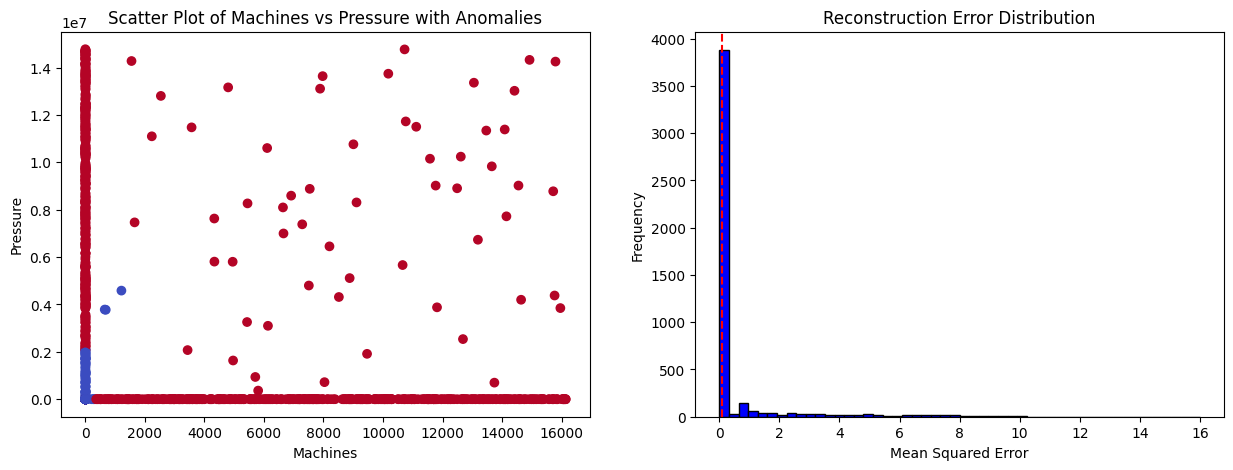

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(df['machines'], df['pressure'], c=df['anomaly'], cmap='coolwarm')
ax[0].set_title('Scatter Plot of Machines vs Pressure with Anomalies')
ax[0].set_xlabel('Machines')
ax[0].set_ylabel('Pressure')

ax[1].hist(mse, bins=50, color='blue', edgecolor='black')
ax[1].axvline(x=threshold, color='red', linestyle='--')
ax[1].set_title('Reconstruction Error Distribution')
ax[1].set_xlabel('Mean Squared Error')
ax[1].set_ylabel('Frequency')

plt.show()

**Output Explanation**
* The scatter plot highlights where anomalies occur based on readings.
* The majority of errors are concentrated near zero, with a few higher values indicating anomalies (blue bars), and the red dashed line marking the threshold for anomaly detection.

### **Visualizing Cleaned Data**
* Box plots are created for the cleaned data (machines and pressure columns) to visualize the distribution of the cleaned features after removing anomalies.

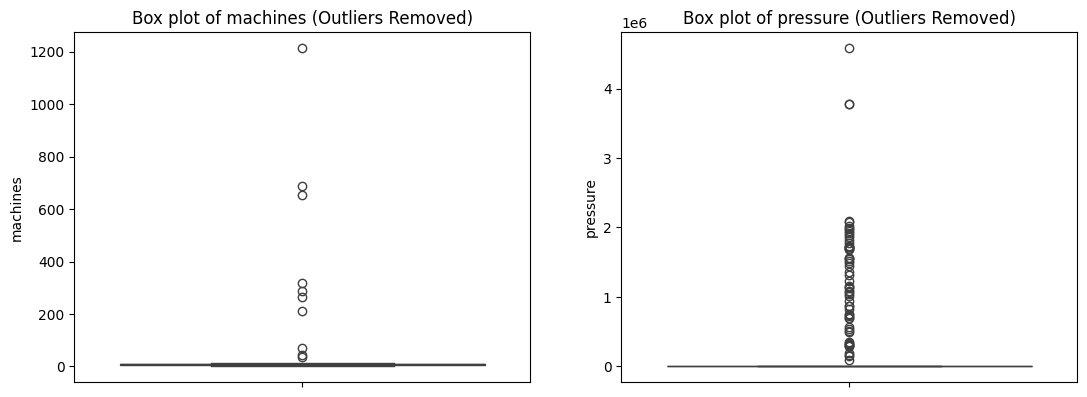

In [35]:
columns = ['machines', 'pressure']
plt.figure(figsize=(20, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box plot of {col} (Outliers Removed)')
plt.show()

**Output Explanation**
* These box plots indicate that the majority of the data points for machines and pressure are concentrated at the lower end, and the removed outliers are clearly visible above the main distribution.

### **Output Cleaned Data and Outliers**
* The cleaned DataFrame is printed and the outliers DataFrame to show the results of the anomaly detection process.

In [36]:
print("Cleaned DataFrame (df_cleaned):")
print(df_cleaned)

print("Outliers DataFrame (outliers):")
print(outliers)

Cleaned DataFrame (df_cleaned):
                         machines  pressure
timestamp                                  
2023-06-01 15:00:04.321         1      1389
2023-06-01 15:00:06.481        13      1004
2023-06-01 15:00:08.642         8       779
2023-06-01 15:00:10.802        12       787
2023-06-01 15:00:12.963         5      1119
...                           ...       ...
2023-06-01 17:59:49.198        14      1320
2023-06-01 17:59:51.358         2       722
2023-06-01 17:59:53.519         3      1322
2023-06-01 17:59:55.679         8       696
2023-06-01 17:59:57.840       688   3775428

[3707 rows x 2 columns]
Outliers DataFrame (outliers):
                         machines  pressure  anomaly
timestamp                                           
2023-06-01 15:00:00.000      4948      1426     True
2023-06-01 15:00:02.160     14031         9     True
2023-06-01 15:00:17.283         9   7440451     True
2023-06-01 15:00:25.925         9   5736410     True
2023-06-01 15:00:28.08

**Output Explanation**
* This DataFrame has had outliers removed and includes cleaned data for machine IDs and their corresponding pressure readings.
* This DataFrame lists the identified outliers, marked by the 'anomaly' column being set to True.